In [1]:
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

In [2]:
# Importar as sequências que vamos usar para a construção da árvore filogenética
# É necessário transferir as sequências do blast

s0  = SeqIO.read("seqGRB14.fasta" , "fasta")
s1  = SeqIO.read("seq_hom1.fasta" , "fasta")
s2  = SeqIO.read("seq_hom2.fasta" , "fasta")
s3  = SeqIO.read("seq_hom3.fasta" , "fasta")
s4  = SeqIO.read("seq_hom4.fasta" , "fasta")
s5  = SeqIO.read("seq_hom5.fasta" , "fasta")
s6  = SeqIO.read("seq_hom6.fasta" , "fasta")
s7  = SeqIO.read("seq_hom7.fasta" , "fasta")
s8  = SeqIO.read("seq_hom8.fasta" , "fasta")

In [3]:
# Renomear as sequências, para facilitar na visualização da árvore filogenética

s0.id  = 'Homo_sapiens'
s1.id  = 'Gorilla_gorilla_gorilla'
s2.id  = 'Hylobates_moloch'
s3.id  = 'Pongo_abelii'
s4.id  = 'Papio_anubis'
s5.id  = 'Theropithecus_gelada'
s6.id  = 'Nomascus_leucogenys'
s7.id  = 'Macaca_fascicularis'
s8.id  = 'Chlorocebus_sabaeus'

In [4]:
# Combinar as sequências num único ficheiro

wfs1 = SeqIO.write([s0,s1,s2,s3,s4,s5,s6,s7,s8], "GRB14.fasta", "fasta")

In [5]:
# O ficheiro criado anteriormente, foi colocado no progrma 'Muscle' e realizou-se o alinhamento múltiplo
#https://www.ebi.ac.uk/Tools/msa/muscle/
# O resultado do alinhamento múltiplo foi descarregado, com extensão '.aln', para a diretória do trabalho

In [6]:
# Abrir o ficheiro do alinhamento múltiplo descarregado como MultipleSeqAlignment object 

with open("Muscle_GRB14.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
    
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [7]:
# Iniciar a  calcular as distâncias entre ramos, através do modelo de identidade

from Bio.Phylo.TreeConstruction import DistanceCalculator 

calculator = DistanceCalculator('identity')

In [8]:
# Matriz das distâncias

distance_matrix = calculator.get_distance(alignment)

print(distance_matrix)

Homo_sapiens	0
Gorilla_gorilla_gorilla	0.0018518518518518823	0
Pongo_abelii	0.005555555555555536	0.007407407407407418	0
Nomascus_leucogenys	0.0092592592592593	0.011111111111111072	0.007407407407407418	0
Hylobates_moloch	0.005555555555555536	0.007407407407407418	0.0037037037037036535	0.0037037037037036535	0
Chlorocebus_sabaeus	0.007407407407407418	0.0092592592592593	0.005555555555555536	0.0092592592592593	0.005555555555555536	0
Macaca_fascicularis	0.007407407407407418	0.0092592592592593	0.005555555555555536	0.007407407407407418	0.005555555555555536	0.0037037037037036535	0
Papio_anubis	0.005555555555555536	0.007407407407407418	0.0037037037037036535	0.007407407407407418	0.0037037037037036535	0.0018518518518518823	0.0018518518518518823	0
Theropithecus_gelada	0.007407407407407418	0.0092592592592593	0.005555555555555536	0.005555555555555536	0.0018518518518518823	0.0037037037037036535	0.0037037037037036535	0.0018518518518518823	0
	Homo_sapiens	Gorilla_gorilla_gorilla	Pongo_abelii	Nomascus_leu

In [9]:
# Início da construção da árvore filogenética

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

constructor = DistanceTreeConstructor(calculator)

In [10]:
# Construção da árvore filogenética

grb14_tree = constructor.build_tree(alignment)

grb14_tree.rooted = True

print(grb14_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner7')
        Clade(branch_length=0.00011574074074072876, name='Inner6')
            Clade(branch_length=0.001736111111111098, name='Macaca_fascicularis')
            Clade(branch_length=0.0008101851851851707, name='Inner5')
                Clade(branch_length=0.0010030864197530796, name='Theropithecus_gelada')
                Clade(branch_length=0.0008487654320987819, name='Inner4')
                    Clade(branch_length=0.0005787037037036993, name='Inner3')
                        Clade(branch_length=0.003703703703703706, name='Inner1')
                            Clade(branch_length=7.806255641895632e-18, name='Homo_sapiens')
                            Clade(branch_length=0.0018518518518518745, name='Gorilla_gorilla_gorilla')
                        Clade(branch_length=0.0018518518518518298, name='Pongo_abelii')
                    Clade(branch_length=0.001273148148148169, name='Inner2')
                        Clade(branch_len

In [11]:
# Gaurdar a árvore filogenética criada num ficheiro 

Phylo.write(grb14_tree, "grb14_tree.xml", "phyloxml")

1

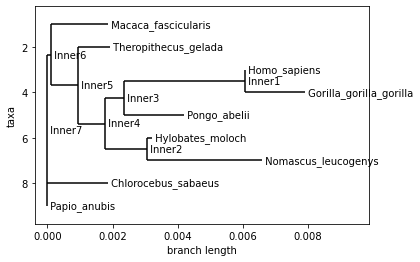

In [12]:
# Criação gráfica da árvore filogenética

import matplotlib
import matplotlib.pyplot as plt

fig = Phylo.draw(grb14_tree)

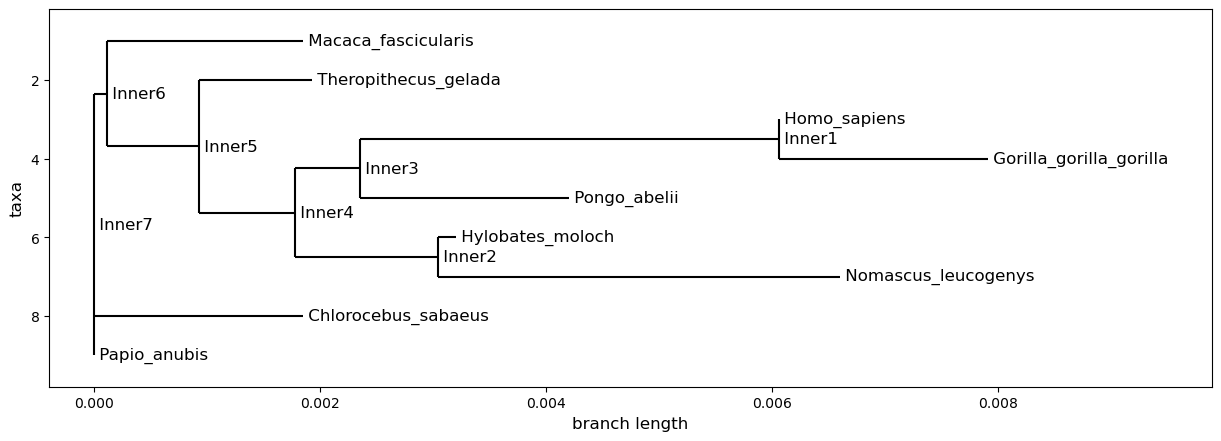

In [13]:
# Melhorar a aparência da árvore filogenética e guardar a figura

fig = plt.figure(figsize=(15, 5), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=12)             # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(grb14_tree, axes=axes)
fig.savefig("grb14_arvorefilogenetica")